In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sdata = pd.read_csv('suicide_data.csv')

In [3]:
sdata

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
sdata.shape


(27820, 12)

In [73]:
sdata.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
sdata.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [74]:
sdata.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [75]:
sdata.count()

country              27820
year                 27820
sex                  27820
age                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
country-year         27820
HDI for year          8364
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

In [76]:
## We will do data cleaning in the last, when we will use HDI for year if necessary.Rset data are already clean i.e error free. 

Text(0, 0.5, 'suicides_no')

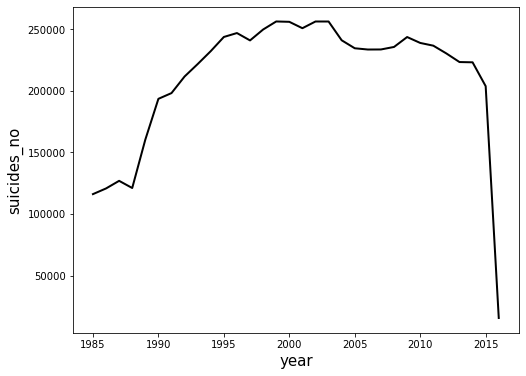

In [77]:
s = sdata['suicides_no'].groupby(sdata.year).sum()
s.plot(figsize=(8,6), linewidth=2, fontsize=10,color='black')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides_no',fontsize=15)

In [78]:
## The above graph shows the number of suicides with respect to the year.
##As we can visualize that from the year 1997 to 2003,the suicides rate is higher due to some reasons.

In [79]:
## Number of suicides in 1985
s_year = sdata[(sdata['year'] == 1985)]
s_year = s_year.groupby('country')[['suicides_no']].sum().reset_index()

## Sorting values in ascending order
s_year = s_year.sort_values(by='suicides_no', ascending=False)

In [80]:
s_year

,country,suicides_no
46,United States,29446
24,Japan,23257
16,France,12501
41,Sri Lanka,5668
45,United Kingdom,5105
22,Italy,4759
8,Brazil,4228
36,Republic of Korea,3689
10,Canada,3258
43,Thailand,2982


In [81]:
## From above we can see the number of suicides in a particular year in a particular states.

In [82]:
s_year = sdata[(sdata['year'] == 2016)]
s_year = s_year.groupby('country')[['suicides_no']].sum().reset_index()
s_year = s_year.sort_values(by='suicides_no', ascending=False)
s_year

,country,suicides_no
15,Thailand,4117
13,Romania,1953
11,Netherlands,1886
6,Hungary,1761
4,Czech Republic,1318
1,Austria,1201
14,Sweden,1130
8,Lithuania,822
2,Croatia,683
10,Mongolia,423


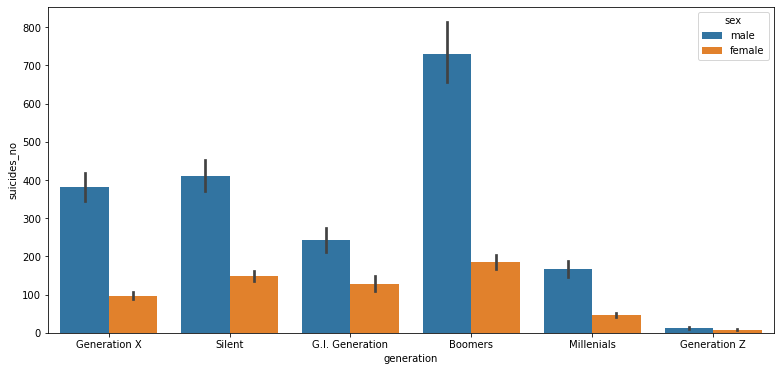

In [83]:
ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = sdata['generation'], y = 'suicides_no',
                  hue='sex',data=sdata, )


In [84]:
## The above figure shows the number of suicides with respect to the generation.

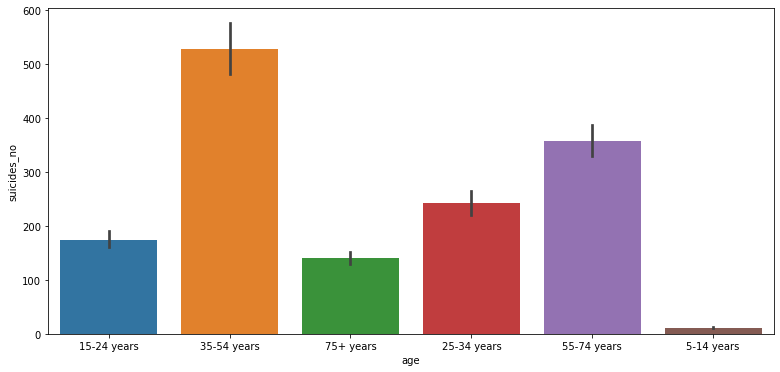

In [85]:
ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = sdata['age'], y = 'suicides_no',
                  data=sdata, )


In [86]:
## The above figure shows the number of suicides with respect to the age.


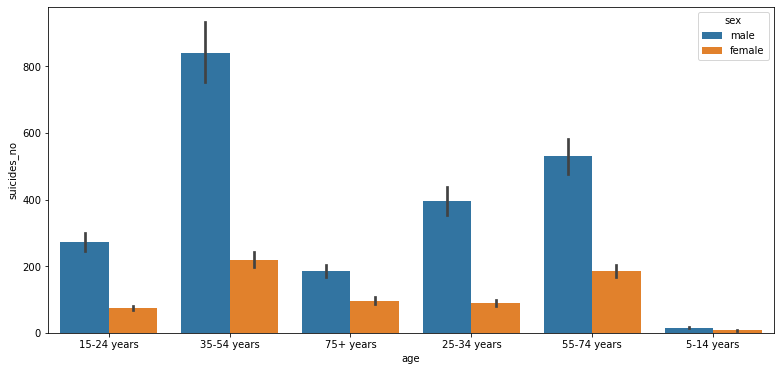

In [87]:
ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = sdata['age'], y = 'suicides_no',
                  hue='sex',data=sdata, )


In [88]:
##These barplots show that generation of boomers have the highest suicide rate, 
## males in general are more likely to commit suicides than females as well as people from age groups 35-54 yrs and 55-74 yrs

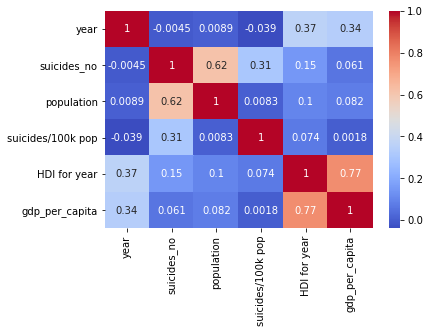

In [89]:
## Correlation of features
a = plt.subplots(1,1,)
a = sns.heatmap(sdata.corr(),annot=True, cmap='coolwarm')

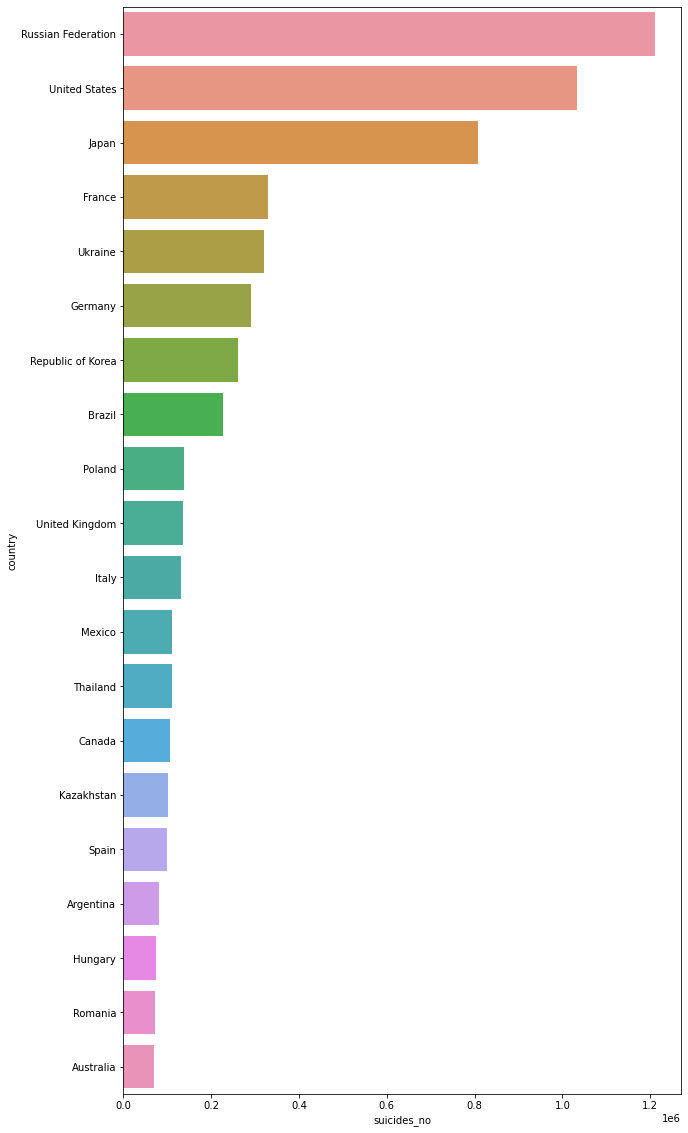

In [90]:
e = sdata['suicides_no'].groupby(sdata.country).sum().sort_values(ascending=False)
a = plt.subplots(1,1,figsize=(10,20))
a = sns.barplot(e.head(20), e.head(20).index,)

In [91]:
##The highest number of suicides is in Russian Federation

In [92]:
## Suicides number by year
s_year = sdata.groupby('year')[['suicides_no']].sum().reset_index()
s_year.sort_values(by='suicides_no', ascending=False)

,year,suicides_no
14,1999,256119
17,2002,256095
18,2003,256079
15,2000,255832
16,2001,250652
13,1998,249591
11,1996,246725
10,1995,243544
24,2009,243487
19,2004,240861


In [93]:
## The highest number of suicides was in 1999 and the lowest in 2016


In [94]:
## Suicides number by age group
s_age = sdata.groupby('age')[['suicides_no']].sum().reset_index()
s_age.sort_values(by='suicides_no', ascending=False)

,age,suicides_no
2,35-54 years,2452141
4,55-74 years,1658443
1,25-34 years,1123912
0,15-24 years,808542
5,75+ years,653118
3,5-14 years,52264


In [95]:
## People committed suicides more in age group 35-54 and 55-74 

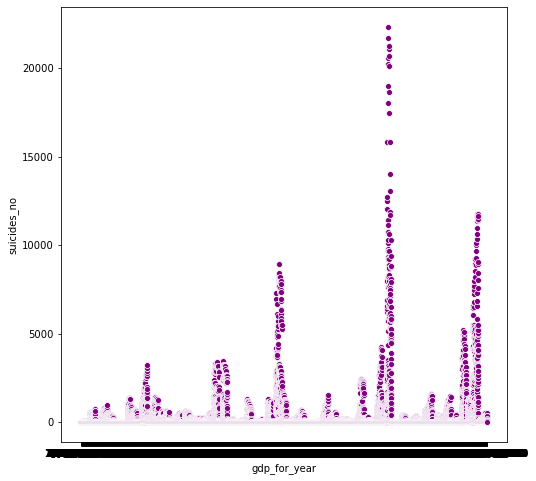

In [101]:
## Relationship between gdp for year and number of suicides
a = plt.subplots(1,1, figsize=(8,8))
a = sns.scatterplot(x="gdp_for_year", y="suicides_no", data=sdata, color='purple')

In [102]:
## The relationship between "gdp_for_year" and "suicides_no" is not linear. 
## Hence, suicide rate does not depend upon gdp directly.

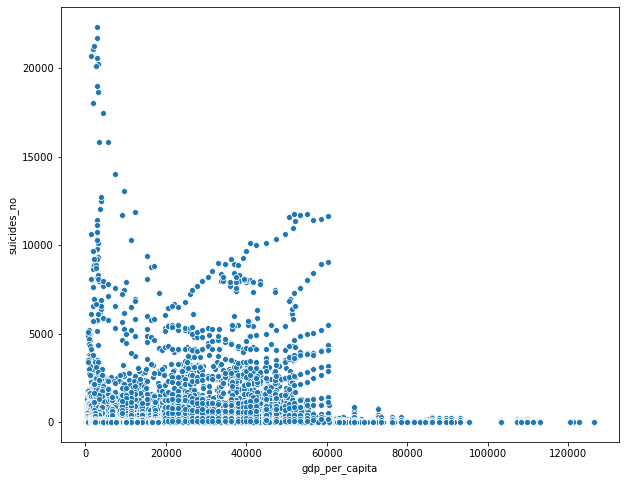

In [103]:
## Relationship between gdp per capita and number of suicides
a = plt.subplots(1,1, figsize=(10,8))
a = sns.scatterplot(x="gdp_per_capita", y="suicides_no", data=sdata)

In [104]:
## Since HDI for year is continious, we can fill those missing values with mean values.

In [106]:
sdata.fillna(sdata.mean(), inplace=True)

In [108]:
sdata.count()

country              27820
year                 27820
sex                  27820
age                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
country-year         27820
HDI for year         27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

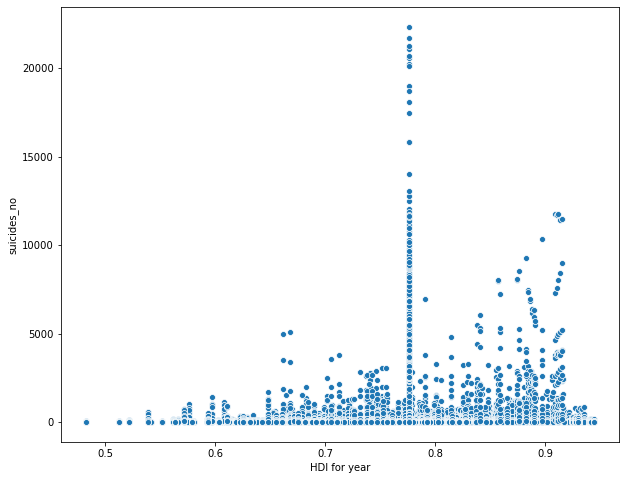

In [110]:
## Relationship between Hdi and number of suicides
a = plt.subplots(1,1, figsize=(10,8))
a = sns.scatterplot(x="HDI for year", y="suicides_no", data=sdata,)


In [ ]:
##   After analysis,we can conclude that from the year 1997 to 2003,the suicide rates increaded due to some reasons.
##   We can see that generation of boomers have the highest suicide rate and also the males in general
##   are more likely to commit suicides than females as well as people from age groups 35-54 yrs and 55-74 yrs.
##   The other important thing that we noticed, the relationship between "GDP" and "SUCIDE" as well as
##   "HDI" and "SUICIDE"is not linear.which shows that GDP and HDI does not have much impact on suicide rate.

##  AKHIL BHALL